In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import mpld3
mpld3.enable_notebook()

In [2]:
# make some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.6, random_state = 0)
X = X[:, ::-1] # flip axes for better plotting

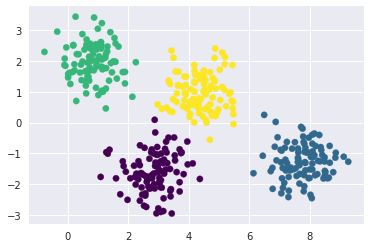

In [3]:
# plot data with k-means labeling
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state = 0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis')

In [4]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters = 4, rseed = 0, ax = None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis', zorder = 2)
    
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw = 3, alpha = 0.5, zorder = 1))
    

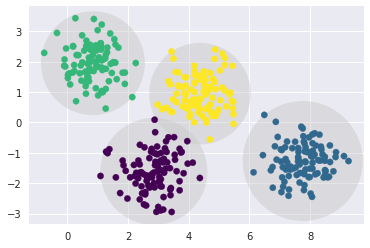

In [5]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X)

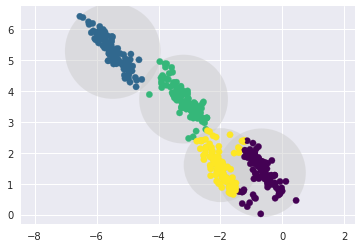

In [6]:
rng = np.random.RandomState(13)
X_streched= np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_streched)

(array([ 6.48826703,  0.25006446]), 0)
(array([ 2.52194722, -2.69798647]), 3)
(array([ 3.06877291, -2.90007604]), 3)
(array([ 4.31427482,  0.70295058]), 0)
(array([ 2.38449945, -2.53563494]), 3)


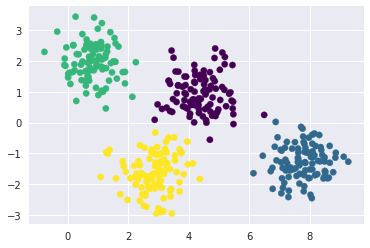

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4).fit(X)
labels = gmm.predict(X)
for x, l in zip(X, labels)[:5]:
    print (x, l)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap = 'viridis')

In [8]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[ 0.531  0.469  0.     0.   ]
 [ 0.     0.     0.     1.   ]
 [ 0.     0.     0.     1.   ]
 [ 1.     0.     0.     0.   ]
 [ 0.     0.     0.     1.   ]]


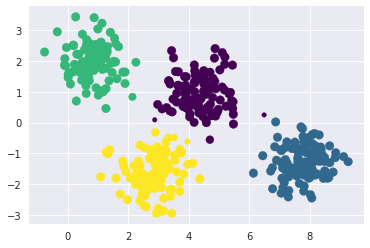

In [9]:
size = 75 * probs.max(1) ** 2
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'viridis', s = size)

In [10]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        print("position: ", position)
        print("width: ", width)
        print("height: ", height)
        print("angle: ", angle)
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, zorder=2, cmap='viridis')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, cmap='viridis')
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        print('###')
        print('mean: ' + str(pos.round(3)))
        print('covar: ' + str(covar.round(3)))
        print('weights: ' + str(w.round(3)))
        draw_ellipse(pos, covar, alpha=w * w_factor)

###
mean: [ 7.762 -1.276]
covar: [[ 0.365  0.013]
 [ 0.013  0.289]]
weights: 0.249
('position: ', array([ 7.76222624, -1.27635633]))
('width: ', 1.2123400722959179)
('height: ', 1.0715980390108133)
('angle: ', -170.61020492186668)
('position: ', array([ 7.76222624, -1.27635633]))
('width: ', 1.2123400722959179)
('height: ', 1.0715980390108133)
('angle: ', -170.61020492186668)
('position: ', array([ 7.76222624, -1.27635633]))
('width: ', 1.2123400722959179)
('height: ', 1.0715980390108133)
('angle: ', -170.61020492186668)
###
mean: [ 2.844 -1.628]
covar: [[ 0.385  0.027]
 [ 0.027  0.374]]
weights: 0.247
('position: ', array([ 2.84407337, -1.62828783]))
('width: ', 1.2759179508989937)
('height: ', 1.1859313977076413)
('angle: ', -140.58026537011037)
('position: ', array([ 2.84407337, -1.62828783]))
('width: ', 1.2759179508989937)
('height: ', 1.1859313977076413)
('angle: ', -140.58026537011037)
('position: ', array([ 2.84407337, -1.62828783]))
('width: ', 1.2759179508989937)
('height: ',

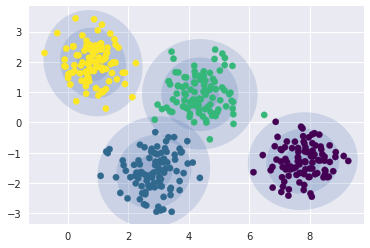

In [11]:
gmm = GaussianMixture(n_components=4, random_state=0)
plot_gmm(gmm, X)

###
mean: [-5.508  5.304]
covar: [[ 0.175 -0.2  ]
 [-0.2    0.271]]
weights: 0.232
('position: ', array([-5.50789302,  5.30445871]))
('width: ', 1.3102924603753947)
('height: ', 0.26035809953121125)
('angle: ', 128.26031676253584)
('position: ', array([-5.50789302,  5.30445871]))
('width: ', 1.3102924603753947)
('height: ', 0.26035809953121125)
('angle: ', 128.26031676253584)
('position: ', array([-5.50789302,  5.30445871]))
('width: ', 1.3102924603753947)
('height: ', 0.26035809953121125)
('angle: ', 128.26031676253584)
###
mean: [-1.321  1.47 ]
covar: [[ 0.574 -0.16 ]
 [-0.16   0.277]]
weights: 0.501
('position: ', array([-1.32068053,  1.47042878]))
('width: ', 1.6052919296725023)
('height: ', 0.9092970348668924)
('angle: ', 156.43529103396435)
('position: ', array([-1.32068053,  1.47042878]))
('width: ', 1.6052919296725023)
('height: ', 0.9092970348668924)
('angle: ', 156.43529103396435)
('position: ', array([-1.32068053,  1.47042878]))
('width: ', 1.6052919296725023)
('height: ', 0

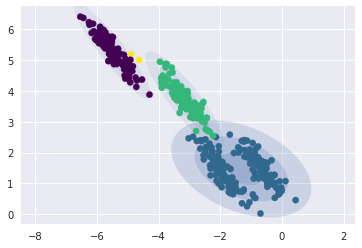

In [12]:
gmm = GaussianMixture(n_components=4, random_state=0)
plot_gmm(gmm, X_streched)

###
mean: [ 4.5  1.8]
covar: [[ 0.1  -0.1 ]
 [-0.1   0.26]]
weights: 0.417
('position: ', array([ 4.49999999,  1.80000001]))
('width: ', 1.1100693715074901)
('height: ', 0.45580047713809813)
('angle: ', 115.67009771131636)
('position: ', array([ 4.49999999,  1.80000001]))
('width: ', 1.1100693715074901)
('height: ', 0.45580047713809813)
('angle: ', 115.67009771131636)
('position: ', array([ 4.49999999,  1.80000001]))
('width: ', 1.1100693715074901)
('height: ', 0.45580047713809813)
('angle: ', 115.67009771131636)
###
mean: [ 0.75   0.875]
covar: [[ 0.063 -0.031]
 [-0.031  0.172]]
weights: 0.333
('position: ', array([ 0.74999937,  0.87499944]))
('width: ', 0.84894108082329856)
('height: ', 0.46562683475721972)
('angle: ', 104.87244002683609)
('position: ', array([ 0.74999937,  0.87499944]))
('width: ', 0.84894108082329856)
('height: ', 0.46562683475721972)
('angle: ', 104.87244002683609)
('position: ', array([ 0.74999937,  0.87499944]))
('width: ', 0.84894108082329856)
('height: ', 0.46

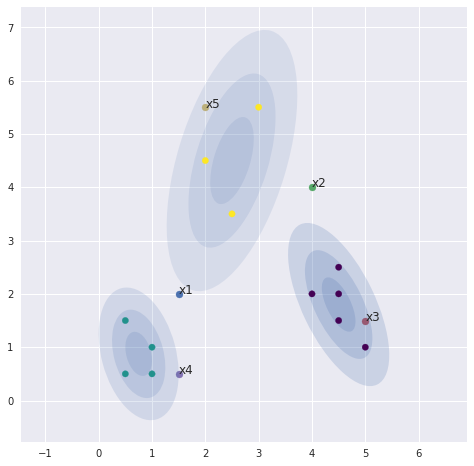

In [13]:
cones = np.array([
    [0.5, 0.5],
    [1.0, 0.5],
    [1.0, 1.0],
    [0.5, 1.5],
    [2.0, 4.5],
    [2.5, 3.5],
    [3.0, 5.5],
    [4.5, 1.5],
    [4.5, 2.0],
    [4.5, 2.5],
    [4.0, 2.0],
    [5.0, 1.0]])
fig, ax = plt.subplots(figsize=(8, 8))
gmm = GaussianMixture(n_components=3, random_state=3)
plot_gmm(gmm, np.concatenate([cones]))


x1 = np.array([1.5, 2.0])
x2 = np.array([4.0, 4.0])
x3 = np.array([5.0, 1.5])
x4 = np.array([1.5, 0.5])
x5 = np.array([2.0, 5.5])

print("x1: " + str(gmm.predict_proba([x1]).round(3)))
print("x2: " + str(gmm.predict_proba([x2]).round(3)))
print("x3: " + str(gmm.predict_proba([x3]).round(3)))
print("x4: " + str(gmm.predict_proba([x4]).round(3)))
print("x5: " + str(gmm.predict_proba([x5]).round(3)))
#new_data = gmm.sample(10)
#print(new_data)



plt.scatter(x1[0], x1[1])
ax.annotate('x1', (x1[0], x1[1]))
plt.scatter(x2[0], x2[1])
ax.annotate('x2', (x2[0], x2[1]))
plt.scatter(x3[0], x3[1])
ax.annotate('x3', (x3[0], x3[1]))
plt.scatter(x4[0], x4[1])
ax.annotate('x4', (x4[0], x4[1]))
plt.scatter(x5[0], x5[1])
ax.annotate('x5', (x5[0], x5[1]))





#print(gmm.predict_proba(test))
# plot_gmm(gmm, test)

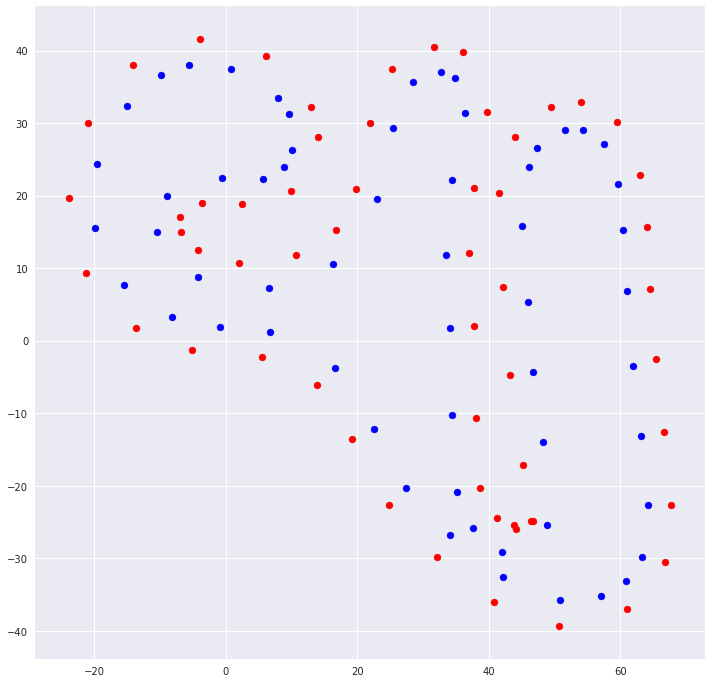

In [14]:
blues = np.array([[ 6.71517, 1.14614 ],
[ 16.6263, -3.71445 ],
[ 22.5569, -12.132 ],
[ 27.4701, -20.2838 ],
[ 34.1288, -26.8371 ],
[ 42.2101, -32.637 ],
[ 50.8377, -35.7644 ],
[ 57.1241, -35.166 ],
[ 60.7835, -33.1287 ],
[ 63.2121, -29.7631 ],
[ 64.1258, -22.6913 ],
[ 63.1305, -13.1407 ],
[ 61.8619, -3.43568 ],
[ 60.9449, 6.87635 ],
[ 60.4299, 15.2973 ],
[ 59.6583, 21.5785 ],
[ 57.4589, 27.1175 ],
[ 54.2525, 29.0883 ],
[ 51.5806, 29.0774 ],
[ 47.3465, 26.5063 ],
[ 46.0348, 23.9758 ],
[ 44.9907, 15.8237 ],
[ 45.9101, 5.34822 ],
[ 46.7706, -4.31009 ],
[ 48.2129, -13.9593 ],
[ 48.9072, -25.4296 ],
[ 42.0596, -29.1506 ],
[ 37.5283, -25.7619 ],
[ 35.1357, -20.8012 ],
[ 34.4132, -10.2633 ],
[ 34.1366, 1.71892 ],
[ 33.4439, 11.8579 ],
[ 34.3723, 22.1917 ],
[ 36.3607, 31.3795 ],
[ 34.8987, 36.2082 ],
[ 32.757, 37.0503 ],
[ 28.4262, 35.6289 ],
[ 25.4142, 29.2666 ],
[ 22.9923, 19.487 ],
[ 16.2838, 10.5264 ],
[ 6.58929, 7.24446 ],
[ -4.16333, 8.7404 ],
[ -10.4986, 14.999 ],
[ -8.98755, 19.9509 ],
[ -0.508117, 22.5064 ],
[ 5.70848, 22.2491 ],
[ 8.84584, 23.9535 ],
[ 10.0486, 26.2627 ],
[ 9.60496, 31.2106 ],
[ 7.92708, 33.4806 ],
[ 0.731843, 37.5204 ],
[ -5.63758, 38.0032 ],
[ -9.84564, 36.6627 ],
[ -15.0624, 32.3392 ],
[ -19.5113, 24.4126 ],
[ -19.8663, 15.6015 ],
[ -15.4453, 7.66862 ],
[ -8.18924, 3.24868 ],
[ -0.895211, 1.92983 ]])

yellows = np.array([
[ 5.54926, -2.25793], 
[ 13.8925, -6.08002], 
[ 19.2352, -13.5571], 
[ 24.7928, -22.6929], 
[ 32.1607, -29.8756], 
[ 40.8205, -35.9857], 
[ 50.7194, -39.3275], 
[ 60.9546, -37.0357], 
[ 66.8251, -30.5516], 
[ 67.7427, -22.6785], 
[ 66.6955, -12.6404], 
[ 65.3828, -2.51962], 
[ 64.5384, 7.09098], 
[ 64.0121, 15.639], 
[ 63.0087, 22.8616], 
[ 59.4208, 30.2162], 
[ 54.0487, 32.8555], 
[ 49.3969, 32.172], 
[ 43.9222, 28.1253], 
[ 41.5511, 20.4321], 
[ 42.0822, 7.38518], 
[ 43.1924, -4.69539], 
[ 45.2565, -17.0738], 
[ 46.4303, -24.8145], 
[ 46.7626, -24.8768], 
[ 43.834, -25.4651], 
[ 44.0723, -25.92], 
[ 41.3066, -24.4328], 
[ 38.7228, -20.252], 
[ 38.0095, -10.6317], 
[ 37.7249, 2.00758], 
[ 37.0314, 12.0826], 
[ 37.8045, 21.035], 
[ 39.7843, 31.5137], 
[ 36.0427, 39.8082], 
[ 31.588, 40.5166], 
[ 25.2587, 37.5153], 
[ 21.8992, 30.0312], 
[ 19.7377, 20.9576], 
[ 16.7226, 15.2459], 
[ 10.733, 11.7971], 
[ 1.99282, 10.7653], 
[ -4.15546, 12.4691], 
[ -6.74524, 14.9841], 
[ -6.94184, 17.0074], 
[ -3.61471, 19.0332], 
[ 2.41273, 18.8033], 
[ 9.86497, 20.6617], 
[ 13.986, 28.0365], 
[ 12.9387, 32.168], 
[ 6.13114, 39.2348], 
[ -3.95847, 41.563], 
[ -14.0938, 38.0423], 
[ -21.0085, 30.0254], 
[ -23.8421, 19.7008], 
[ -21.1785, 9.32384], 
[ -13.606, 1.78503], 
[ -5.15058, -1.22558]]);
fig, ax = plt.subplots(figsize=(12, 12))
plt.scatter(blues[:, 0], blues[:, 1], color='blue') #, c = labels, cmap = 'viridis', s = size)
plt.scatter(yellows[:, 0], yellows[:, 1], color='red') #, c = labels, cmap = 'viridis', s = size)


NameError: name 'plot_gmm_intrinsics' is not defined

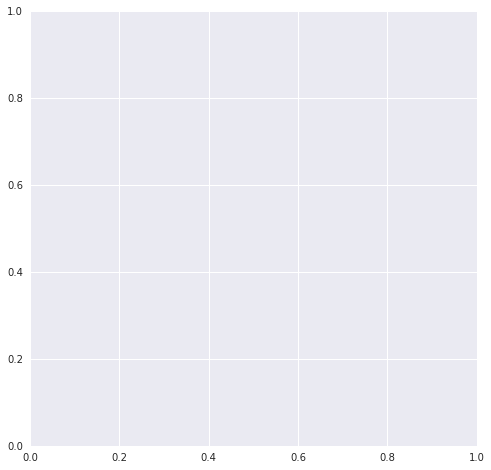

In [15]:
cones = np.array([
    [0.5, 0.5],
    [1.0, 0.5],
    [1.0, 1.0],
    [0.5, 1.5],
    [2.0, 4.5],
    [2.5, 3.5],
    [3.0, 5.5],
    [4.5, 1.5],
    [4.5, 2.0],
    [4.5, 2.5],
    [4.0, 2.0],
    [5.0, 1.0]
        ])
fig, ax = plt.subplots(figsize=(8, 8))

x1 = np.array([1.5, 2.0])
x2 = np.array([4.0, 4.0])
x3 = np.array([5.0, 1.5])
x4 = np.array([1.5, 0.5])
x5 = np.array([2.0, 5.5])

means = np.array([[0.75, 0.5]
                , [2.25, 4.0]
                , [4.50, 2  ]])
covariances = np.array([[[1.0625, 0], [0, 1]]
                       ,[[1.0625, -0.125], [-0.125, 1.25]]
                       ,[[1, 0], [0, 1.167]]])

weights = np.array([0.285714, 0.285714, 0.428571])
#fig, ax = plt.subplots(figsize=(8,8))
plot_gmm_intrinsics(cones, means, covariances, weights) # , ax = ax)
print("x1: " + str(gmm.predict_proba([x1]).round(3)))
print("x2: " + str(gmm.predict_proba([x2]).round(3)))
print("x3: " + str(gmm.predict_proba([x3]).round(3)))
print("x4: " + str(gmm.predict_proba([x4]).round(3)))
print("x5: " + str(gmm.predict_proba([x5]).round(3)))
#new_data = gmm.sample(10)
#print(new_data)

plt.scatter(x1[0], x1[1])
ax.annotate('x1', (x1[0], x1[1]))
plt.scatter(x2[0], x2[1])
ax.annotate('x2', (x2[0], x2[1]))
plt.scatter(x3[0], x3[1])
ax.annotate('x3', (x3[0], x3[1]))
plt.scatter(x4[0], x4[1])
ax.annotate('x4', (x4[0], x4[1]))
plt.scatter(x5[0], x5[1])
ax.annotate('x5', (x5[0], x5[1]))

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=0)

fig, ax = plt.subplots(figsize=(8, 8))
#ax.set_ylim([-5,5])
#ax.set_xlim([-5,5])
plot_gmm(gmm, cones, ax=ax)
plt.scatter(x1[0], x1[1])
ax.annotate('x1', (x1[0], x1[1]))
plt.scatter(x2[0], x2[1])
ax.annotate('x2', (x2[0], x2[1]))
plt.scatter(x3[0], x3[1])
ax.annotate('x3', (x3[0], x3[1]))
plt.scatter(x4[0], x4[1])
ax.annotate('x4', (x4[0], x4[1]))
plt.scatter(x5[0], x5[1])
ax.annotate('x5', (x5[0], x5[1]))
probs = gmm.predict_proba([x1, x2,x3,x4,x5])
print(probs.round(3))

In [32]:
yellow_cone_data = np.array([
np.array([[3.76783, -1.95591], [[3.15856e-07, 1.10833e-05], [1.10833e-05, 0.000417146]], [0.0150754]]),
np.array([[8.22141, -2.71096], [[9.01087e-05, 0.000378631], [0.000378631, 0.00160046]], [0.0100503]]),
np.array([[12.2258, -4.55865], [[0.000678132, 0.00122097], [0.00122097, 0.00220447]], [0.0100503]]),
np.array([[15.5592, -7.60139], [[0.00113403, 0.00111063], [0.00111063, 0.00108942]], [0.0100503]]),
np.array([[18.2042, -11.5554], [[0.000829022, 0.000508022], [0.000508022, 0.00031163]], [0.0125628]]),
np.array([[20.5239, -16.0591], [[5.04e-06, 2.67e-06], [2.67e-06, 1.4225e-06]], [0.0100503]]),
np.array([[23.1623, -20.6256], [[0.000397097, 0.000242556], [0.000242556, 0.000148222]], [0.0100503]]),
np.array([[26.4233, -24.7601], [[0.000411747, 0.000361537], [0.000361537, 0.000317627]], [0.0100503]]),
np.array([[30.1744, -28.2946], [[0.000122935, 0.000138215], [0.000138215, 0.000155428]], [0.0100503]]),
np.array([[34.1471, -31.4566], [[2.63869e-05, 3.39075e-05], [3.39075e-05, 4.3575e-05]], [0.0100503]]),
np.array([[38.297, -34.4527], [[2.9615e-05, 4.238e-05], [4.238e-05, 6.06569e-05]], [0.0100503]]),
np.array([[42.8393, -37.2121], [[0.00027185, 0.000494434], [0.000494434, 0.000900318]], [0.0125628]]),
np.array([[47.9784, -39.1178], [[0.000163447, 0.000570067], [0.000570067, 0.001999]], [0.0100503]]),
np.array([[53.4604, -39.5371], [[1.17688e-06, 7.40437e-06], [7.40437e-06, 0.00253914]], [0.0100503]]),
np.array([[58.8758, -38.3367], [[0.000228022, -0.000772583], [-0.000772583, 0.00263597]], [0.0100503]]),
np.array([[63.7264, -35.3011], [[0.00108435, -0.0013862], [-0.0013862, 0.00177505]], [0.00753769]]),
np.array([[66.8251, -30.5516], [[0.0045318, -0.0021335], [-0.0021335, 0.00101094]], [0.0100503]]),
np.array([[67.8267, -25.2548], [[0.00194551, -0.000208228], [-0.000208228, 2.29475e-05]], [0.0100503]]),
np.array([[67.6588, -20.1022], [[0.000358622, 2.33269e-05], [2.33269e-05, 1.54688e-06]], [0.0100503]]),
np.array([[67.0471, -15.1061], [[2.61769e-05, 3.47e-06], [3.47e-06, 4.6e-07]], [0.0100503]]),
np.array([[66.3439, -10.1747], [[8.96875e-07, 1.15e-07], [1.15e-07, 1.5e-08]], [0.0100503]]),
np.array([[65.6903, -5.25565], [[1.03019e-05, 1.35306e-06], [1.35306e-06, 1.77719e-07]], [0.0100503]]),
np.array([[65.1369, -0.330803], [[2.6356e-05, 2.82388e-06], [2.82388e-06, 3.02701e-07]], [0.0125628]]),
np.array([[64.7011, 4.60865], [[1.59319e-05, 1.29438e-06], [1.29438e-06, 1.05225e-07]], [0.0100503]]),
np.array([[64.3757, 9.57331], [[7.90688e-06, 4.63438e-07], [4.63438e-07, 2.71688e-08]], [0.0100503]]),
np.array([[64.1014, 14.6037], [[2.54e-06, 1.95e-07], [1.95e-07, 1.5e-08]], [0.0100503]]),
np.array([[63.6757, 19.7823], [[0.000273107, 3.09775e-05], [3.09775e-05, 3.535e-06]], [0.0100503]]),
np.array([[62.5033, 25.1705], [[0.00177828, 0.000503188], [0.000503188, 0.000143047]], [0.0100503]]),
np.array([[59.4208, 30.2162], [[0.00268818, 0.00217402], [0.00217402, 0.00176269]], [0.00753769]]),
np.array([[54.0597, 32.9033], [[0.000814422, 0.00297482], [0.00297482, 0.0112401]], [0.0100503]]),
np.array([[48.223, 31.9533], [[0.00118013, -0.00328596], [-0.00328596, 0.00932105]], [0.0100503]]),
np.array([[43.9222, 28.1253], [[0.00434424, -0.00364625], [-0.00364625, 0.00307648]], [0.0100503]]),
np.array([[41.8204, 23.0512], [[0.00300431, -0.000918487], [-0.000918487, 0.000282815]], [0.0100503]]),
np.array([[41.2818, 17.8129], [[0.000979925, -5.18525e-05], [-5.18525e-05, 2.915e-06]], [0.0100503]]),
np.array([[41.5338, 12.7231], [[0.000162635, 1.09625e-05], [1.09625e-05, 7.41875e-07]], [0.0100503]]),
np.array([[42.0473, 7.75639], [[1.81688e-06, 1.6e-07], [1.6e-07, 1.42e-08]], [0.0100503]]),
np.array([[42.5488, 2.81786], [[1.67176e-05, 1.6302e-06], [1.6302e-06, 1.5908e-07]], [0.0125628]]),
np.array([[42.969, -2.16206], [[8.81875e-07, 5.9375e-08], [5.9375e-08, 4.025e-09]], [0.0100503]]),
np.array([[43.4157, -7.22872], [[4.4595e-05, 4.5385e-06], [4.5385e-06, 4.62169e-07]], [0.0100503]]),
np.array([[44.1453, -12.3392], [[0.000212675, 3.3785e-05], [3.3785e-05, 5.37188e-06]], [0.0100503]]),
np.array([[45.2787, -17.2545], [[9.41525e-05, 2.19688e-05], [2.19688e-05, 5.12688e-06]], [0.0100503]]),
np.array([[46.3456, -21.6277], [[0.000764742, 0.000160059], [0.000160059, 3.36119e-05]], [0.0100503]]),
np.array([[46.5727, -24.8412], [[0.0349958, -0.00645893], [-0.00645893, 0.00148366]], [0.0175879]]),
np.array([[43.9732, -25.7754], [[0.0185768, -0.0389025], [-0.0389025, 0.0988608]], [0.0175879]]),
np.array([[40.8334, -23.9662], [[0.00070756, 0.00105868], [0.00105868, 0.00158404]], [0.00502513]]),
np.array([[40.693, -24.1306], [[0.0022427, 0.00211663], [0.00211663, 0.0020022]], [0.00753769]]),
np.array([[38.7228, -20.252], [[0.00571214, 0.00243737], [0.00243737, 0.00105015]], [0.0125628]]),
np.array([[37.9859, -15.6373], [[0.00114986, 0.000113486], [0.000113486, 1.14425e-05]], [0.0100503]]),
np.array([[37.9852, -10.6689], [[6.75736e-05, -1.4688e-06], [-1.4688e-06, 3.44e-08]], [0.0125628]]),
np.array([[38.0635, -5.57966], [[5.99119e-05, -1.6325e-07], [-1.6325e-07, 9e-10]], [0.0100503]]),
np.array([[37.9089, -0.498545], [[7.16819e-05, 3.00649e-06], [3.00649e-06, 1.26967e-07]], [0.0100503]]),
np.array([[37.5409, 4.5137], [[1.56269e-05, 1.16069e-06], [1.16069e-06, 8.62187e-08]], [0.0100503]]),
np.array([[37.1319, 9.4215], [[2.064e-05, 1.774e-06], [1.774e-06, 1.52675e-07]], [0.0100503]]),
np.array([[36.9509, 14.2116], [[0.000478402, 6.1776e-06], [6.1776e-06, 1.304e-07]], [0.0125628]]),
np.array([[37.3288, 18.9193], [[0.0010443, -0.000116619], [-0.000116619, 1.32224e-05]], [0.0125628]]),
np.array([[38.3991, 23.6796], [[0.0002321, -5.8895e-05], [-5.8895e-05, 1.49569e-05]], [0.0100503]]),
np.array([[39.7801, 28.8475], [[0.00100291, -0.000221049], [-0.000221049, 4.89184e-05]], [0.0125628]]),
np.array([[39.7895, 34.8463], [[0.0089287, 0.00118169], [0.00118169, 0.000171197]], [0.0100503]]),
np.array([[35.9996, 39.7682], [[0.00206116, 0.00161624], [0.00161624, 0.00126736]], [0.00502513]]),
np.array([[36.166, 39.9361], [[0.0013727, 0.0017784], [0.0017784, 0.002304]], [0.00502513]]),
np.array([[30.0497, 40.6942], [[5.58689e-05, -0.000657868], [-0.000657868, 0.0107275]], [0.00753769]]),
np.array([[25.2587, 37.5153], [[0.00225816, -0.00248307], [-0.00248307, 0.00273789]], [0.00753769]]),
np.array([[22.6678, 32.7686], [[0.00145482, -0.000749934], [-0.000749934, 0.000387162]], [0.00753769]]),
np.array([[22.5816, 32.8088], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[21.3397, 27.8237], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[21.3164, 27.8299], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[21.2976, 27.8344], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[21.2825, 27.8378], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[21.2718, 27.8401], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[20.3736, 23.0988], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[20.3754, 23.0985], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[20.3817, 23.0974], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[20.3925, 23.0953], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[20.4079, 23.092], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[19.0211, 18.842], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[19.0508, 18.8333], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[19.085, 18.822], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[19.1234, 18.8074], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[19.1652, 18.7894], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[16.6313, 15.3123], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[16.6777, 15.2827], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[16.7239, 15.2493], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[16.7688, 15.2124], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[16.8113, 15.1729], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[13.1014, 12.7087], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[13.1299, 12.6663], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[13.1548, 12.6247], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[13.1763, 12.5845], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.78722, 11.1845], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.79865, 11.1502], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.80835, 11.1171], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.81656, 11.0849], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.82346, 11.0534], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.22014, 10.6247], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.22378, 10.594], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.22643, 10.5631], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.22811, 10.5317], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.22876, 10.4996], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-0.229903, 11.0445], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-0.23303, 11.0082], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-0.237829, 10.9701], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-0.244598, 10.9298], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-0.253658, 10.8874], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-4.10876, 12.5729], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-4.12724, 12.5236], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-4.15021, 12.4715], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-4.17838, 12.4171], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-4.21271, 12.3604], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.68087, 15.045], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.74125, 14.984], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.81361, 14.9234], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.89791, 14.8662], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.99165, 14.817], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.5598, 17.6283], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.67114, 17.5995], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.79234, 17.5839], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.92309, 17.5844], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-7.0641, 17.6055], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-7.21317, 17.6524], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-7.36338, 17.7297], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-3.54933, 18.8196], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-3.60269, 18.9513], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-3.62973, 19.0539], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-3.64319, 19.1374], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-3.64862, 19.204], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[1.43189, 18.7379], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[1.43354, 18.755], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[1.4344, 18.762], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[1.43429, 18.759], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[1.43333, 18.7463], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[7.30893, 19.0599], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[7.31194, 19.004], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[7.31992, 18.9372], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[7.33575, 18.8576], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[12.3248, 22.4733], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[12.405, 22.3863], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[12.4924, 22.312], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[13.8931, 28.0584], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[13.9865, 28.0332], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[14.0785, 28.0178], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[14.1683, 28.0116], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[12.4583, 33.5241], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[12.5305, 33.5519], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[12.5979, 33.5842], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.80404, 37.6653], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.84467, 37.7066], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[8.88066, 37.7478], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.07015, 40.3231], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.08962, 40.3619], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.10682, 40.4003], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[4.12201, 40.4386], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-1.21793, 41.6034], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-1.20958, 41.6431], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-1.20286, 41.6835], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-1.19783, 41.7247], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.70388, 41.3952], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.70642, 41.4395], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.71113, 41.4845], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.71811, 41.5301], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.8826, 39.5742], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.899, 39.6192], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.9175, 39.6632], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.938, 39.7058], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-16.24, 36.395], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-16.2654, 36.4292], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-16.2911, 36.4611], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-16.3171, 36.4905], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.6911, 32.3531], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.7159, 32.3726], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.7407, 32.3908], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.7655, 32.4077], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.2469, 27.6495], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.2739, 27.6634], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.3022, 27.6768], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.3319, 27.6897], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.7359, 22.4222], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.7722, 22.432], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.8101, 22.4406], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.8493, 22.4478], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.8284, 16.9672], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.8709, 16.9676], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.9137, 16.9661], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-23.9565, 16.9627], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.4859, 11.7006], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.5261, 11.6881], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.5655, 11.6739], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-22.6039, 11.6582], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.7611, 7.00114], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.7954, 6.97963], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.8287, 6.95672], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-19.8611, 6.9324], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-15.9023, 3.17611], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-15.9304, 3.14621], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-15.9572, 3.11524], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-15.9826, 3.08332], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.243, 0.4896], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.2615, 0.456235], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.2781, 0.423114], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-11.2931, 0.390427], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.17898, -1.07104], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.18781, -1.10082], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.19538, -1.12963], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-6.20178, -1.15745], [[0, 0], [0, 0]], [0.00251256]]),
np.array([[-0.988938, -1.66895], [[0, 0], [0, 0]], [0.00251256]]),
]);

In [33]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, facecolor='black', **kwargs))
        

def plot_cluster_intrinsics(data, ax=None, color="black"):
    positions   = data[:, 0]
    covariances = data[:, 1]
    weights     = data[:, 2]
    pos_x = [e[0] for e in positions]
    pos_y = [e[1] for e in positions]

    ax.scatter(pos_x, pos_y, color = color)
    for pos, covar, w in zip(positions, covariances, weights):
        draw_ellipse(np.array(pos), np.array(covar), ax = ax, alpha=w[0])

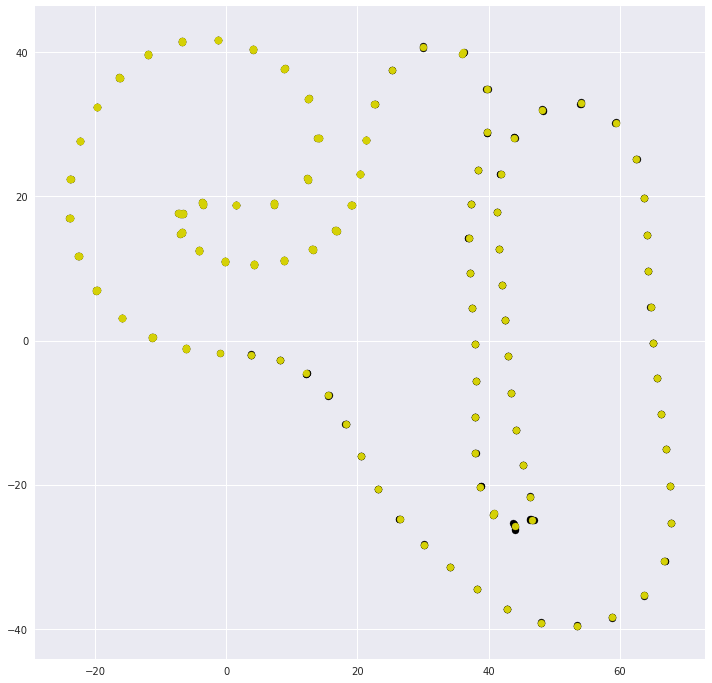

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:100% !important; }</style>"))

import csv

yellow_cone_ground_truth_x = np.array([])
yellow_cone_ground_truth_y = np.array([])
blue_cone_ground_truth_x   = np.array([])
blue_cone_ground_truth_y   = np.array([])
red_cone_ground_truth_x    = np.array([])
red_cone_ground_truth_y    = np.array([])

with open('../tests/example-data/wemding-map-ground-truth-cones-d-a-x-y-c-t.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
    for row in reader:
        x = row[2]
        y = row[3]
        color = row[4]
        # print(x,y, color)
        if color == ' 0':
            yellow_cone_ground_truth_x = np.append(yellow_cone_ground_truth_x, x);
            yellow_cone_ground_truth_y = np.append(yellow_cone_ground_truth_y, y); 
        elif color == ' 1':
            blue_cone_ground_truth_x = np.append(blue_cone_ground_truth_x, x); 
            blue_cone_ground_truth_y = np.append(blue_cone_ground_truth_y, y);
        else:
            red_cone_ground_truth_x = np.append(red_cone_ground_truth_x, x); 
            red_cone_ground_truth_y = np.append(red_cone_ground_truth_y, y); 

plt.figure(figsize=(12,12))
ax = plt.gca()
ax.scatter(yellow_cone_ground_truth_x, yellow_cone_ground_truth_y, color='black')
# ax.scatter(blue_cone_ground_truth_x, blue_cone_ground_truth_y, color='black')

plot_cluster_intrinsics(yellow_cone_data, ax=ax, color='#D5D106')
#plot_cluster_intrinsics(blue_cone_data, ax=ax, color='#898AEF')


# print(yellow_cone_ground_truth_y)